In [319]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Juntar Pinguins
1. Criei uma imagem do tamanho das somas da largura dos pinguins e com a altura maxima ocupada por algum pinguins.
2. Colei as imagens no seus respectivos locais (ao lado do final do ultimo pinguin)

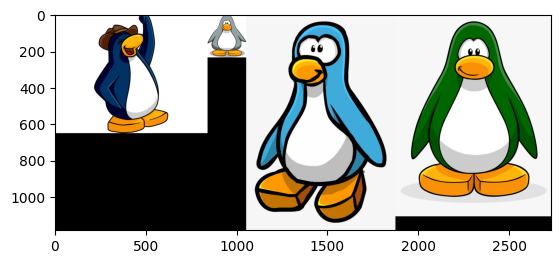

In [320]:
p1 = Image.open("P1.png")
p2 = Image.open("P2.png")
p3 = Image.open("P3.jpg")
p4 = Image.open("P4.png")

largura_total = p1.width + p2.width + p3.width + p4.width
altura_total = max(p1.height, p2.height, p3.height, p4.height)

p_total = Image.new('RGB', (largura_total, altura_total))
p_total.paste(p1, (0, 0))
p_total.paste(p2, (p1.width, 0))
p_total.paste(p3, (p1.width + p2.width, 0))
p_total.paste(p4, (p1.width + p2.width + p3.width, 0))

plt.imshow(p_total)
p_total.save('juntar_pinguins.png')

# Mudar Cor
1. Transformei a imagem em um array para que fosse possivel a manipulação pixel a pixel das cores;
2. Fiz as alteração das cores com valores a minha escolha.

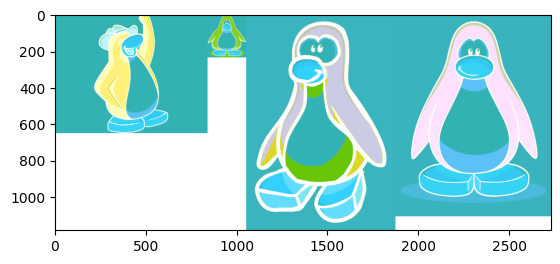

In [321]:
img = Image.open('juntar_pinguins.png')
img = np.array(img)
img_colorida = np.zeros(shape=img.shape, dtype=np.uint8)
l, c, _ = img.shape

for i in range(l):
    for j in range(c):
        r = img[i, j, 0]
        g = img[i, j, 1]
        b = img[i, j, 2]
        img_colorida[i, j, 0] = (255 - r * 0.8)
        img_colorida[i, j, 1] = (255 - g * 0.3)
        img_colorida[i, j, 2] = (255 - b * 1.3)

img_colorida = Image.fromarray(img_colorida)
img_colorida.save('mudar_cor.png')
plt.imshow(img_colorida)

# Espelhamento
1. Criei uma imagem vazia do mesmo shape da imagem anterior;
2. a imagem resultante recebe o valor de cada pixel da imagem de trás pra frente, deixando ela espelhada.

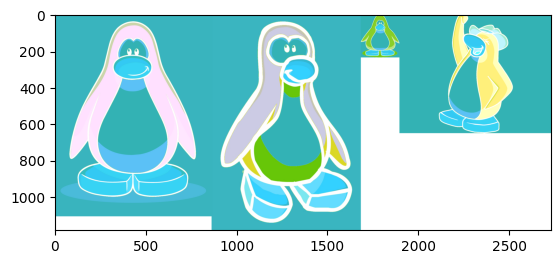

In [322]:
img = Image.open('mudar_cor.png')
img = np.array(img)

img_espelhada = np.zeros(shape=img.shape, dtype=np.uint8)
img_espelhada[::, ::] = img[::, ::-1]

img_espelhada = Image.fromarray(img_espelhada)
img_espelhada.save('espelhar_imagem.png')
plt.imshow(img_espelhada)

# Recortar Pinguin favorito
1. Criei um array de zeros com o tamanho do pinguin favorito escolhido;
2. Cada valor de pixel recebe a imagem anterior deslocada somente para conter o pinguin favorito.

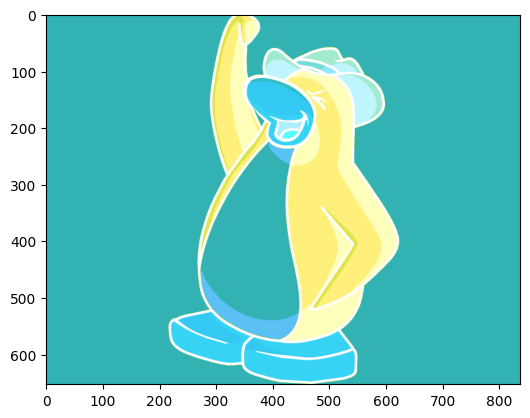

In [323]:
p1 = Image.open('P1.png')
p1 = np.array(p1)
img_espelhada = Image.open('espelhar_imagem.png')
img_espelhada = np.array(img_espelhada)

img_cortada = np.zeros(shape=(p1.shape[0], p1.shape[1], 3), dtype=np.uint8)

img_cortada[: , :] = img_espelhada[0:p1.shape[0] , largura_total - p1.shape[1]:largura_total]

img_cortada = Image.fromarray(img_cortada)
img_cortada.save('pinguin_favorito.png')
plt.imshow(img_cortada)
plt.show()

# Analise do histograma e escolha do 
1. Utilizando o Histograma é possivel ver um pico de cores que é a cor predominante da imagem (background);

In [324]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

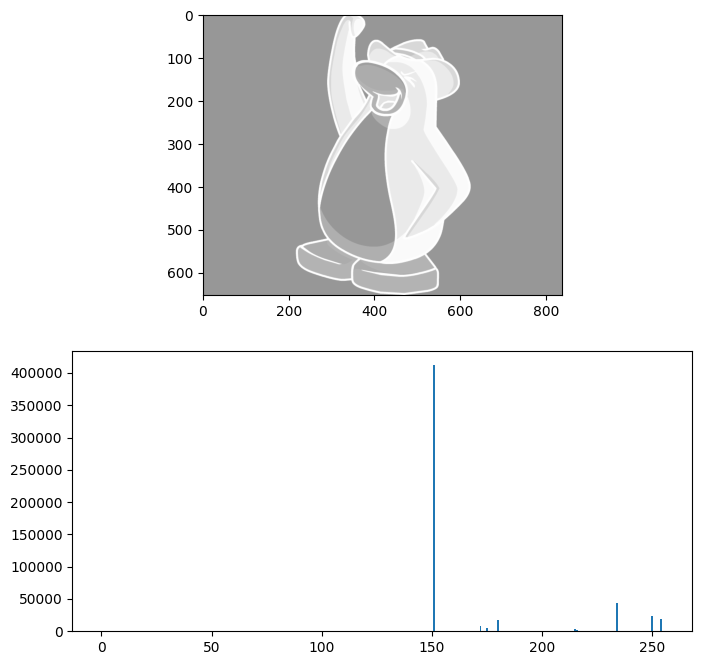

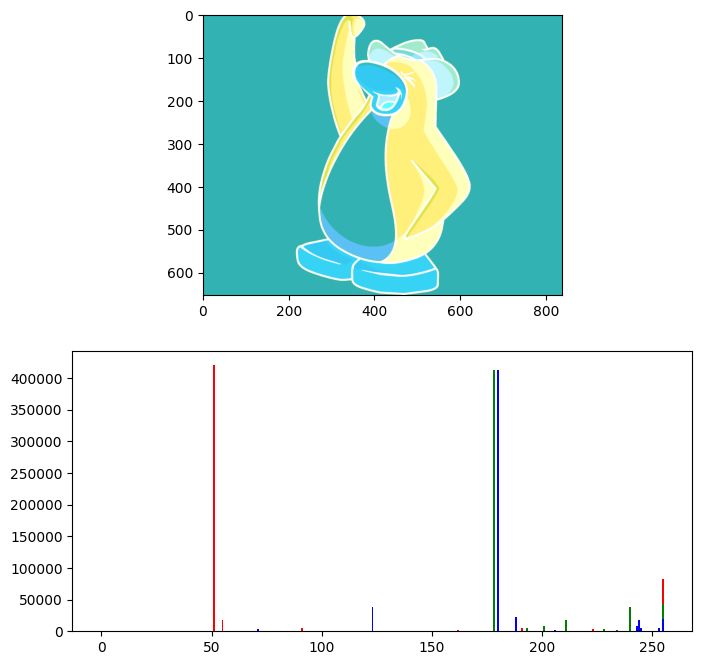

In [325]:
img = Image.open('pinguin_favorito.png')
img = np.array(img)
img_gray = ((0.2126 * img[:, :, 0]) + (0.7152 * img[:, :, 1]) + (0.0722 * img[:, :, 2])).astype(np.uint8)


histogram = show_histogram_gray(img_gray)
histogram = show_histogram(img)

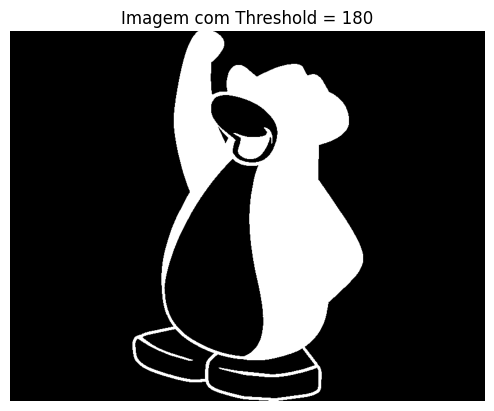

In [326]:
threshold = 180

img_threshold = np.where(img_gray > threshold, 255, 0).astype(np.uint8)
plt.imshow(img_threshold, cmap="gray")

plt.title(f'Imagem com Threshold = {threshold}')
plt.axis('off')
plt.show()

Utilizando o `threshold = 180` é possivel fazer o recorte do pinguin ja que a coloração do background consta na faixa de 0-180

# Pintar todos os pixeis abaixo dele
1. Separando os valores abaixo dele é possivel retirar o background da imagem.

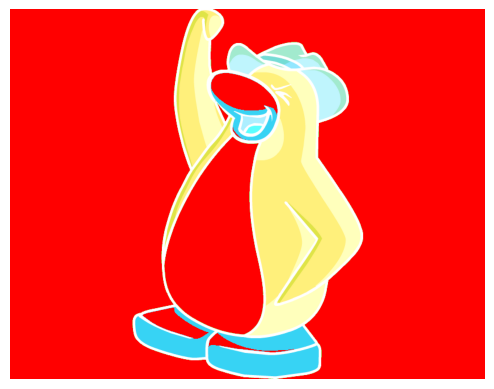

In [327]:
red_color = [255, 0, 0]  # Vermelho em RGB

for i in range(img.shape[0]):  # Iterar sobre as linhas
    for j in range(img.shape[1]):  # Iterar sobre as colunas
        if img_gray[i, j] < threshold:
            img[i, j] = red_color  # Pintar de vermelho
plt.imshow(img)
plt.axis('off')
plt.show()
img = Image.fromarray(img)
img.save('colorir_com_threshold.png')